<a href="https://colab.research.google.com/github/Mr-Aditya-Jadhav/Heart-Dieses-Prediction-System/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT Required Lib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


print("IMPORT Succesfull")

: 

#read the csv dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final Year Project/heart.csv") #https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
data.columns

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Total number of rows and columns
data.shape

(303, 14)

## Feature selection
#get correlation of each feature in dataset

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

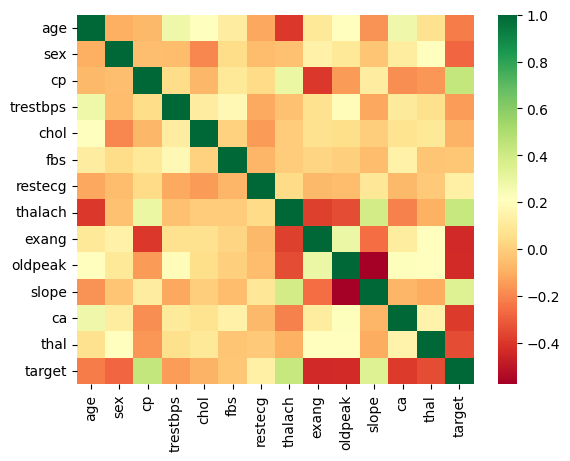

In [ ]:
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=False,cmap="RdYlGn")


In [ ]:
# Calculate the correlation between each feature and the target feature
correlations = data.corr()['target'].sort_values()

print(correlations)

# Identify features with correlation coefficients close to zero
low_correlation_features = correlations[np.abs(correlations) < 0.35].index.tolist()

# Print the names of the low correlation features
print("Very less correlation with Target : ", low_correlation_features)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64
Very less correlation with Target :  ['thal', 'sex', 'age', 'trestbps', 'chol', 'fbs', 'restecg', 'slope']


#Data Drop and Split 70:30

In [ ]:
data=data.drop(['sex', 'fbs', 'restecg', 'slope', 'chol', 'age', 'trestbps','thal'], axis=1)

target=data['target']
data = data.drop(['target'],axis=1)
data.head()

# We split the data into training and testing set:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=10)
print("Data Preprocessing Completed")

Data Preprocessing Completed


#New DataSET


In [ ]:
print("New Data Set")
data.head()


New Data Set


,cp,thalach,exang,oldpeak,ca
0,3,150,0,2.3,0
1,2,187,0,3.5,0
2,1,172,0,1.4,0
3,1,178,0,0.8,0
4,0,163,1,0.6,0


In [ ]:
data.shape

(303, 5)

## Base Learners

In [ ]:
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

#Support Vector Machine(SVM)

In [ ]:
pipeline_svm = make_pipeline(SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]},
                    cv = kfolds,
                    verbose=1,
                    n_jobs=-1)

grid_svm.fit(x_train, y_train)
grid_svm.score(x_test, y_test)
print("\nBest Model: %f using %s" % (grid_svm.best_score_, grid_svm.best_params_))
print('\n')
print('SVM LogLoss {score}'.format(score=log_loss(y_test, grid_svm.predict_proba(x_test)*100)))
clfs.append(grid_svm)

# save best model to current working directory
joblib.dump(grid_svm, "heart_disease_svm.pkl")

# load from file and predict using the best configs found in the CV step
model_grid_svm = joblib.load("heart_disease_svm.pkl" )

# get predictions from best model above
y_preds = model_grid_svm.predict(x_test)
print('SVM accuracy score: ',accuracy_score(y_test, y_preds)*100)
print('\n')

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Model: 0.844186 using {'svc__C': 0.1}


SVM LogLoss 0.6931471805599454
SVM accuracy score:  76.92307692307693




#Performance Testing of SVM

1.  Confusion matrix Building
2.  Precision
3.  Recall
4.  F1 Score


[[36 14]
 [ 7 34]]
Confusion matrix of the classifier Support Vector machine


<ipython-input-38-ffd7014b668e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-38-ffd7014b668e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


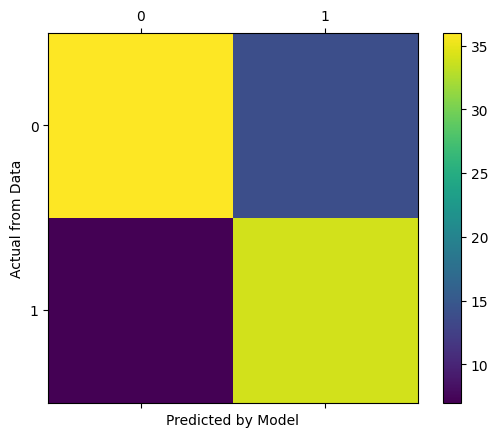

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
print("Confusion matrix of the classifier Support Vector machine")
#print("\n")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
#plt.title('Confusion matrix of the classifier Support Vector machine')

fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted by Model')
plt.ylabel('Actual from Data')
plt.show()

print('\n')


Classification Report SVM


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        50
           1       0.71      0.83      0.76        41

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



# Multinomial Naive Bayes

In [ ]:
# Multinomial Naive Bayes(NB)
classifierNB=MultinomialNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)

print('MultinomialNB LogLoss {score}'.format(score=log_loss(y_test, classifierNB.predict_proba(x_test))))
clfs.append(classifierNB)

# save best model to current working directory
joblib.dump(classifierNB, "heart_disease_cnb.pkl")

# load from file and predict using the best configs found in the CV step
model_classifierNB = joblib.load("heart_disease_cnb.pkl" )

# get predictions from best model above
y_preds = model_classifierNB.predict(x_test)
print('MultinomialNB accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')

MultinomialNB LogLoss 0.5357017455066246
MultinomialNB accuracy score:  0.7582417582417582




#Performance Testing

[[34 16]
 [ 6 35]]


<ipython-input-41-848207181ce7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-41-848207181ce7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


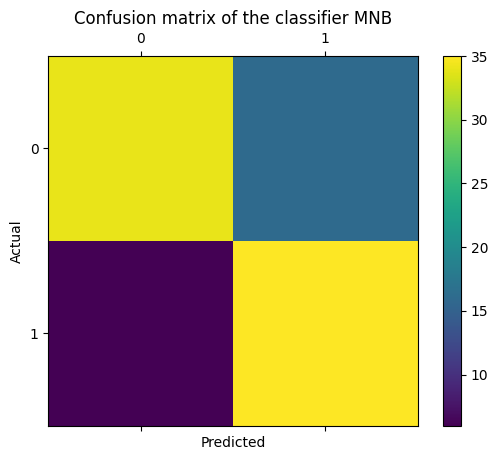

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier MNB')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report MNB


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))



              precision    recall  f1-score   support

           0       0.85      0.68      0.76        50
           1       0.69      0.85      0.76        41

    accuracy                           0.76        91
   macro avg       0.77      0.77      0.76        91
weighted avg       0.78      0.76      0.76        91



#Logistic Regeression


In [ ]:
# Logistic Regression(LR)
classifierLR=LogisticRegression()

classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)

print('LogisticRegression LogLoss {score}'.format(score=log_loss(y_test, classifierLR.predict_proba(x_test))))
clfs.append(classifierLR)

# save best model to current working directory
joblib.dump(classifierLR, "heart_disease_lr.pkl")

# load from file and predict using the best configs found in the CV step
model_classifierLR = joblib.load("heart_disease_lr.pkl" )

# get predictions from best model above
y_preds = model_classifierLR.predict(x_test)
print('Logistic Regression accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')


LogisticRegression LogLoss 0.4785279314979095
Logistic Regression accuracy score:  0.7692307692307693




#Performance Testing

[[34 16]
 [ 5 36]]


<ipython-input-44-40db712446bc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-44-40db712446bc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


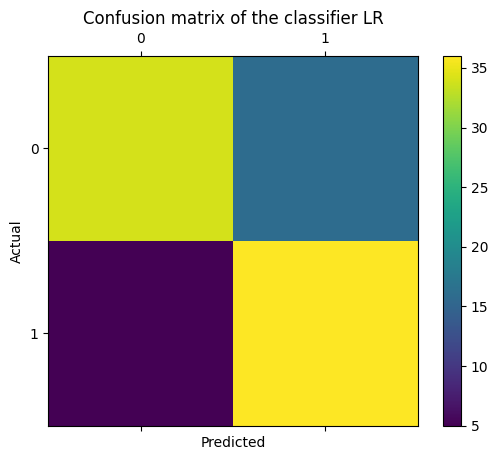

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier LR')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Classification Report LR


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.69      0.88      0.77        41

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91




# Decision Tree (DT)



In [ ]:
classifierDT=DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3, min_samples_leaf=5)
classifierDT.fit(x_train,y_train)
classifierDT.score(x_test, y_test)

print('Decision Tree LogLoss {score}'.format(score=log_loss(y_test, classifierDT.predict_proba(x_test))))
clfs.append(classifierDT)

# save best model to current working directory
joblib.dump(classifierDT, "heart_disease_dt.pkl")

# load from file and predict using the best configs found in the CV
model_classifierDT = joblib.load("heart_disease_dt.pkl" )

# get predictions from best model above
y_preds = model_classifierDT.predict(x_test)
print('Decision Tree accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')



Decision Tree LogLoss 0.9076515735501838
Decision Tree accuracy score:  0.7582417582417582




#Performance Testing

[[35 15]
 [ 7 34]]


<ipython-input-47-061933127462>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-47-061933127462>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


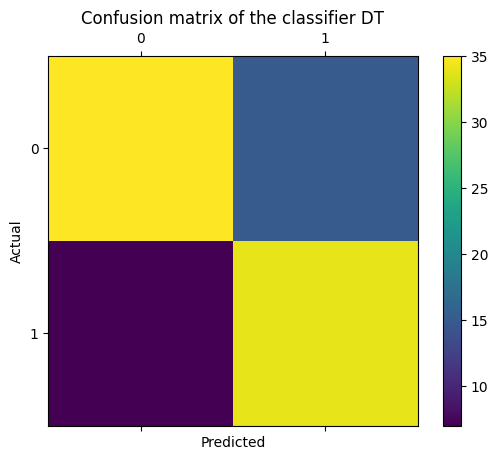

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier DT')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report DT


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.83      0.70      0.76        50
           1       0.69      0.83      0.76        41

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



# Random Forest(RF)



In [ ]:
classifierRF=RandomForestClassifier()
classifierRF.fit(x_train,y_train)
classifierRF.score(x_test, y_test)
print('RandomForest LogLoss {score}'.format(score=log_loss(y_test, classifierRF.predict_proba(x_test))))
clfs.append(classifierRF)

# save best model to current working directory
joblib.dump(classifierRF, "heart_disease_rf.pkl")

# load from file and predict using the best configs found in the CV step
model_classifierRF = joblib.load("heart_disease_rf.pkl" )

# get predictions from best model above
y_preds = model_classifierRF.predict(x_test)
print('Random Forest accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')


RandomForest LogLoss 0.9056763675522954
Random Forest accuracy score:  0.7472527472527473




#Performance Testing

[[33 17]
 [ 6 35]]


<ipython-input-50-12438aac906b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-50-12438aac906b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


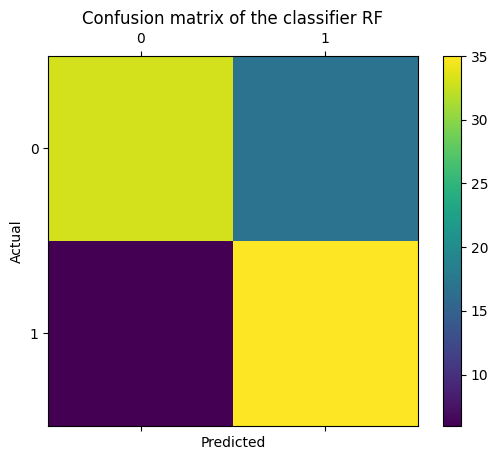

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier RF')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report RF


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.85      0.66      0.74        50
           1       0.67      0.85      0.75        41

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.75        91
weighted avg       0.77      0.75      0.75        91



#Performance Testing Report of Base Learners.


In [ ]:
print('\n')
print('Accuracy of svm: {}'.format(grid_svm.score(x_test, y_test)))

print('Accuracy of naive bayes: {}'.format(classifierNB.score(x_test, y_test)))

print('Accuracy of logistic regression: {}'.format(classifierLR.score(x_test, y_test)))

print('Accuracy of decision tree: {}'.format(classifierDT.score(x_test, y_test)))

print('Accuracy of random forest: {}'.format(classifierRF.score(x_test, y_test)))





Accuracy of svm: 0.7692307692307693
Accuracy of naive bayes: 0.7582417582417582
Accuracy of logistic regression: 0.7692307692307693
Accuracy of decision tree: 0.7582417582417582
Accuracy of random forest: 0.7472527472527473


# Ensemble Majority Voting Classifier  


In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('svm', grid_svm), ('nb', classifierNB), ('lr', classifierLR), ('dt', classifierDT),('rf', classifierRF)]

#create our voting classifier, inputting our models
majority_voting = VotingClassifier(estimators, voting='hard')

#fit model to training data
majority_voting.fit(x_train, y_train)
#test our model on the test data
majority_voting.score(x_test, y_test)

# save best model to current working directory
joblib.dump(majority_voting, "heart_disease_mv.pkl")

# load from file and predict using the best configs found in the CV step
model_max_v = joblib.load("heart_disease_mv.pkl" )

# get predictions from best model above
y_preds = model_max_v.predict(x_test)
print('majority_voting_accuracy: ',majority_voting.score(x_test, y_test))
print('\n')


Fitting 5 folds for each of 3 candidates, totalling 15 fits
majority_voting_accuracy:  0.7692307692307693




#Performance Testing

[[35 15]
 [ 6 35]]


<ipython-input-54-1520474784b2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-54-1520474784b2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


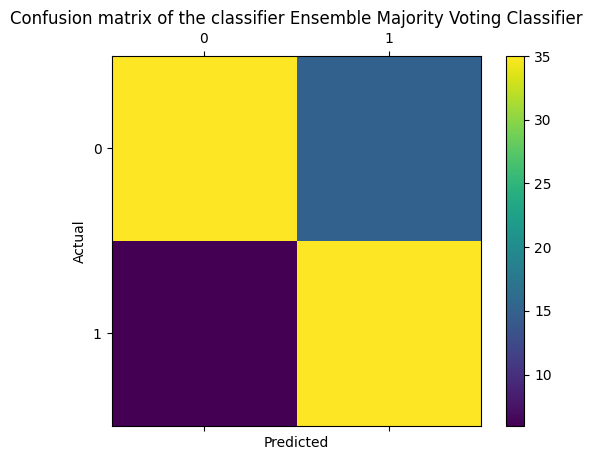

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier Ensemble Majority Voting Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report RF


In [ ]:

print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.85      0.70      0.77        50
           1       0.70      0.85      0.77        41

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



#Ensemble Weighted average classifier

In [ ]:
#finding the optimum weights
from scipy.optimize import minimize
predictions = []
for clff in clfs:
    predictions.append(clff.predict_proba(x_test))

def log_loss_func(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return log_loss(y_test, final_prediction)

#the algorithms need a starting value, right not we chose 0.5 for all weights
#its better to choose many random starting points and run minimize a few times
starting_values = [0.5]*len(predictions)

#adding constraints  and a different solver as suggested by user 16universe
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
#our weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)

res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('ensamble score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

weighted_avg = VotingClassifier(estimators, voting='soft',weights=res['x']).fit(x_train, y_train)
print('The accuracy weighted average classifier is :', weighted_avg.score(x_test,y_test))

# save best model to current working directory
joblib.dump(weighted_avg, "heart_disease_wav.pkl")

# load from file and predict using the best configs found in the CV step
model_w_avg = joblib.load("heart_disease_wav.pkl" )

# get predictions from best model above
y_preds = model_w_avg.predict(x_test)
print('weighted_average_accuracy: ',weighted_avg.score(x_test, y_test))
print('\n')


ensamble score: 0.47116868324592553
Best Weights: [0.00000000e+00 1.20152922e-17 7.02211986e-01 1.19507831e-01
 1.78280184e-01]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
The accuracy weighted average classifier is : 0.8021978021978022
weighted_average_accuracy:  0.8021978021978022




#Performance Testing

[[36 14]
 [ 4 37]]


<ipython-input-57-d62687276cb8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-57-d62687276cb8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


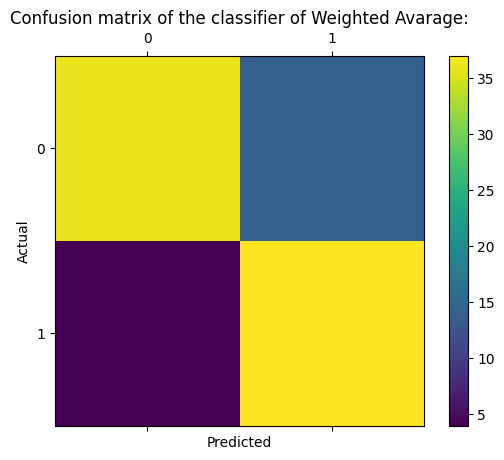

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier of Weighted Avarage:')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report RF


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))

print("end")




              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.73      0.90      0.80        41

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91

end


# Bagging

In [ ]:
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(x_train,y_train)
classifierBa.score(x_test, y_test)

# save best model to current working directory
joblib.dump(classifierBa, "heart_disease_bag.pkl")

# load from file and predict using the best configs found in the CV step
model_bagging = joblib.load("heart_disease_bag.pkl" )

# get predictions from best model above
y_preds = model_bagging.predict(x_test)
print('bagging_accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')


bagging_accuracy score:  0.7802197802197802




#Performance Testing

[[35 15]
 [ 5 36]]


<ipython-input-60-86eb2b75ad7e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-60-86eb2b75ad7e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


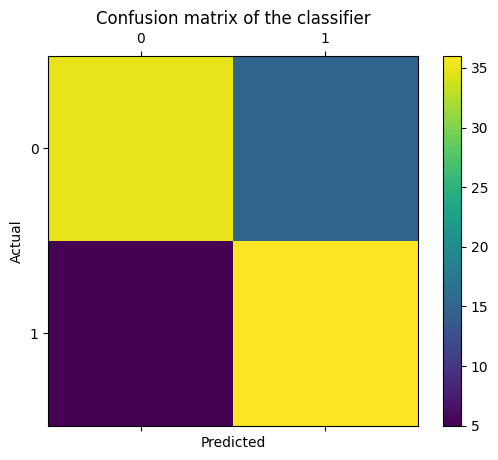

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report Bagging


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.71      0.88      0.78        41

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91



# AdaBoost Classifier

In [ ]:

classifierAdaBoost= AdaBoostClassifier(n_estimators=500)
classifierAdaBoost.fit(x_train,y_train)
classifierAdaBoost.score(x_test, y_test)

# save best model to current working directory
joblib.dump(classifierAdaBoost, "heart_disease_adb.pkl")

# load from file and predict using the best configs found in the CV step
model_Ada_boost = joblib.load("heart_disease_adb.pkl" )

# get predictions from best model above
y_preds = model_Ada_boost.predict(x_test)
print('Ada_boost_accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')


Ada_boost_accuracy score:  0.7032967032967034




#Performance Testing

[[33 17]
 [10 31]]


<ipython-input-63-86eb2b75ad7e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-63-86eb2b75ad7e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


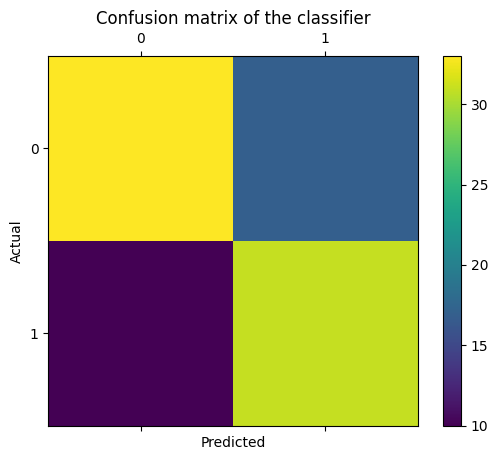

In [ ]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report AdaBoost


In [ ]:
print('\n')
print(classification_report(y_test, y_preds))




              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.65      0.76      0.70        41

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.71      0.70      0.70        91



##Final Testing Report of Ensemble Learning and Classifiers.

In [ ]:

print('Ensemble Learners :')
print('Majority Voting accuracy score: ',majority_voting.score(x_test, y_test))
print('Weighted Average accuracy score: ',weighted_avg.score(x_test, y_test))
print('Bagging_accuracy score: ',classifierBa.score(x_test, y_test))
print('Ada_boost_accuracy score: ',classifierAdaBoost.score(x_test, y_test))
print("\n\n")
print("Base lerners :")
print('Accuracy of svm: {}'.format(grid_svm.score(x_test, y_test)))
print('Accuracy of naive bayes: {}'.format(classifierNB.score(x_test, y_test)))
print('Accuracy of logistic regression: {}'.format(classifierLR.score(x_test, y_test)))
print('Accuracy of decision tree: {}'.format(classifierDT.score(x_test, y_test)))
print('Accuracy of random forest: {}'.format(classifierRF.score(x_test, y_test)))




Ensemble Learners :
Majority Voting accuracy score:  0.7692307692307693
Weighted Average accuracy score:  0.8021978021978022
Bagging_accuracy score:  0.7802197802197802
Ada_boost_accuracy score:  0.7032967032967034



Base lerners :
Accuracy of svm: 0.7692307692307693
Accuracy of naive bayes: 0.7582417582417582
Accuracy of logistic regression: 0.7692307692307693
Accuracy of decision tree: 0.7582417582417582
Accuracy of random forest: 0.7472527472527473
